<a href="https://colab.research.google.com/github/hellopamarthi/ML/blob/main/Salaryhike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:

print('Mean:', round(data.Salary.mean(), 4))
print('Standard Deviation: ', round(data.Salary.std(), 4))

Mean: 76003.0
Standard Deviation:  27414.4298


In [4]:

data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
##shape 0 rows, 1 columns.
data.shape[0]

30

In [8]:
data.shape[1]

2

In [9]:
data.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:

##describe on specific column data set
data['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [11]:
##Groupby 'Rank Attribute'

df_rank=data.groupby(['Salary'])

In [12]:
df_rank.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [13]:
data[data['Salary']>120000]

,YearsExperience,Salary
28,10.3,122391.0
29,10.5,121872.0


In [14]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


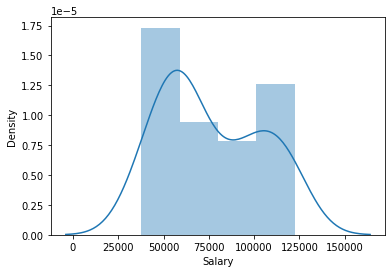

In [15]:
import seaborn as sns
sns.distplot(data['Salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


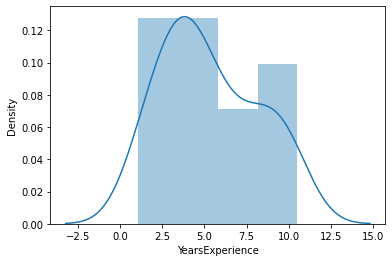

In [16]:
import seaborn as sns
sns.distplot(data['YearsExperience'])

In [18]:
## PACKAGE STATSMODEL is to be used for linear reression. 
## OLS - Ordinary Least Square. 
## linear regression model is pullinginto model. 

import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

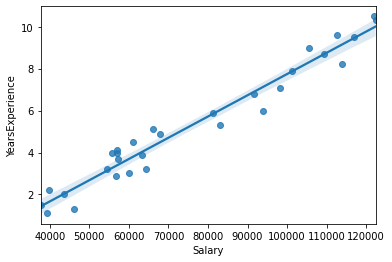

In [19]:
sns.regplot(x="Salary", y="YearsExperience", data=data);

In [20]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [23]:
newdata=pd.Series([6.8,9.6])

In [26]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [27]:
model.predict(data_pred)

0     90051.943985
1    116511.838485
dtype: float64